# Model Learning of Customers' Churn Rate for Model Fitness

## Introduction

Model Fitness, a fitness center franchise, is currently working on customer engagement strategies based on analytical data. One of the most common challenges faced by fitness centers, and indeed many other service providers, is customer churn. To reduce churn rates, Model Fitness has digitized several customer profiles.

### Goals :
This project aims to analyze Model Fitness' customer profiles and develop customer retention strategies.

### Steps :

- Generate Information of Datasets
- Exploratory Data Analysis
- Model to Predict Users' Churn Rate
- Users Clustering
- Conclusion

## General Information

Import Python libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import math as mt
import math
import numpy as np
import seaborn as sns
from plotly import graph_objects as go
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Read the dataset.

In [2]:
try :
    df = pd.read_csv('gym_churn_us.csv')

except :
    df = pd.read_csv('/datasets/gym_churn_us.csv')

Checking general information of dataset consists of :

- 'Churn' : actual churn on particular month
- 'gender'
- 'Near_Location' : whether the user lives or works near a fitness center location
- 'Partner' : whether the user is an employee of a partner company (this fitness center has a partner company and its employees are entitled to discounts)
- Promo_friends : whether the user initially registered through a "refer a friend" offer
- 'Phone' : whether users provide their phone numbers
- 'Age'
- 'Lifetime' : time (in months) since the customer's first visit to the fitness center

Data from visit and purchase logs, as well as data related to current membership status:

- 'Contract_period' : 1 month, 3 month, 6 month, or 1 year
- 'Month_to_end_contract' : the remaining months before the contract ends
- 'Group_visits' : whether users take part in group sessions
- 'Avg_class_frequency_total' : average frequency of visits per week during the customer's lifetime
- 'Avg_class_frequency_current_month' : average frequency of visits per week throughout the current month
- 'Avg_additional_charges_total' : the total amount of money spent to pay for other services in the fitness center: cafe, athletic goods, cosmetics, massage, etc.

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

(4000, 14)

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


There is no missing value found and all data type are already correct. However, name of columns written in uppercas and lowercase. 

Fixing name of columns to be lowercase.

In [5]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

## Exploratory Data Analysis

Checking statistic description of dataset.

In [6]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Checking feature distribution of the two groups: for those who leave (churn); and for those who stay.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

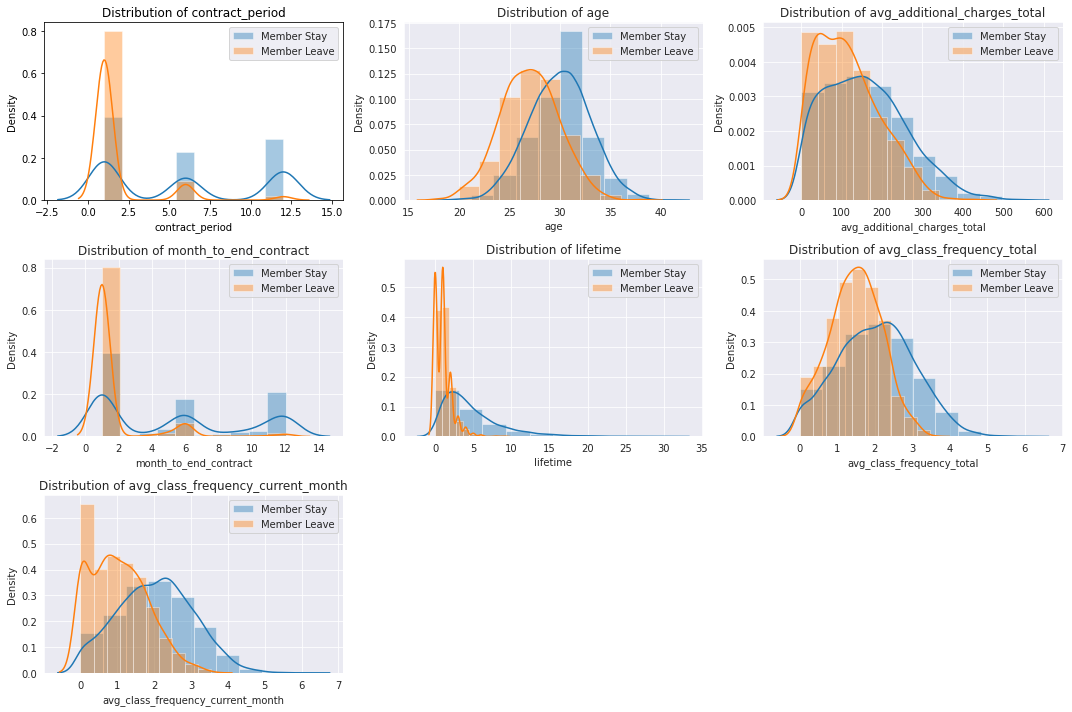

In [7]:
stay = df[df['churn'] == 0] #filter users who do not leave
leave = df[df['churn'] == 1] #filter users who leave  

columns = ['contract_period', 'age', 'avg_additional_charges_total', 
           'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
           'avg_class_frequency_current_month']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i) 
    sns.set_style('darkgrid')
    sns.distplot(stay[column], bins=10, label='Member Stay')
    sns.distplot(leave[column], bins=10, label='Member Leave')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()  
plt.show()

In [8]:
df.groupby('churn').median()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,1,1,1,0,1,6,0,30,149.881171,6.0,4,2.043252,2.046697
1,1,1,0,0,1,1,0,27,103.814686,1.0,1,1.491187,0.979445


Findings :

- From the graph above, it is shown that the users who used to stay are around 30 years old, while the one who leave are around 27 years old.

- For `avg_class_frequency_current_month` or `avg_class_frequency_total`, both shows that users who stay tends to have normal distribution, in which they make visit more often then the one who leave. This is also in line with `avg_additional_charges_total` distribution , which is users who stay spend more money than the one who leave.

- From the contract period distribution and lifetime distribution show that users who leave tends to have shorter contract period or lifetime than the one who stay. This might be a cause of their leaving.

Making correlation matrix to see correlation between one feature and another.

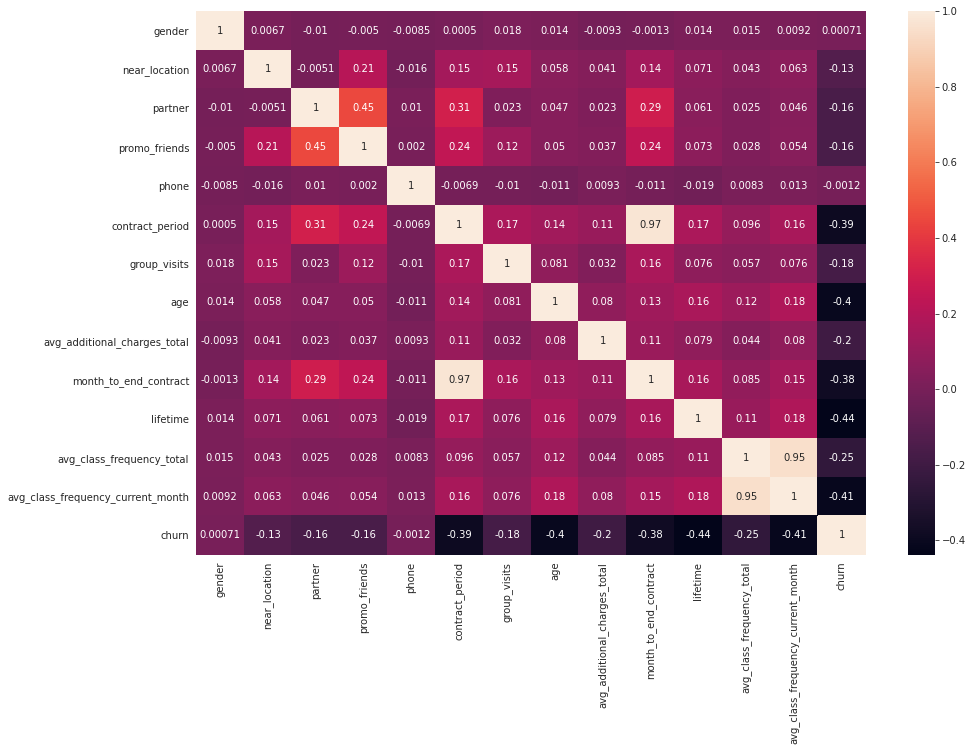

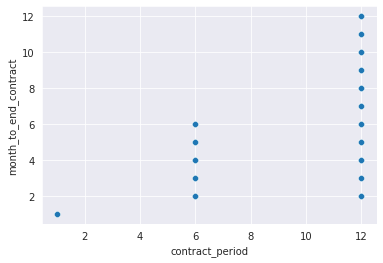

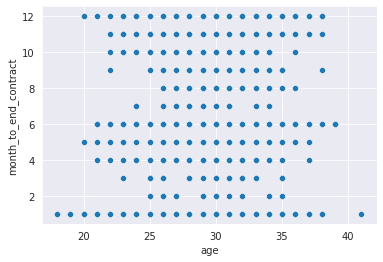

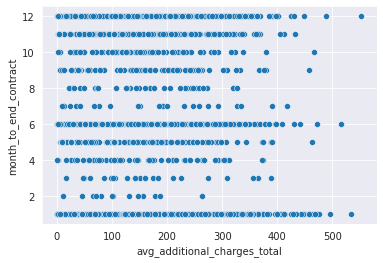

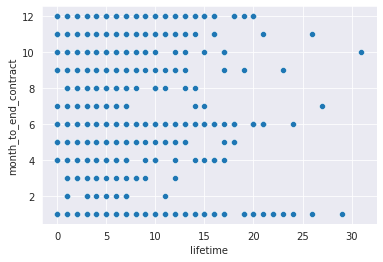

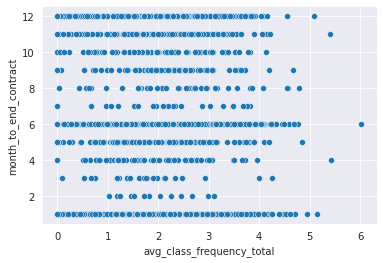

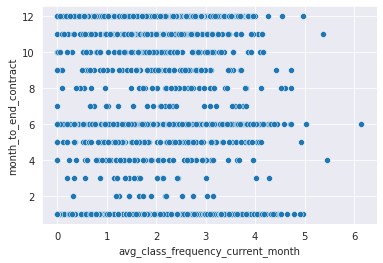

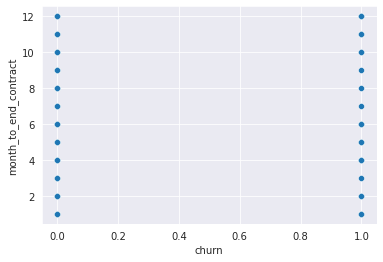

In [9]:
cm = df.corr() 

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True)

plt.show()

for col in df.drop(['month_to_end_contract', 'gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits'],
                   axis=1).columns:
    sns.scatterplot(x=df[col], y=df['month_to_end_contract'])
    plt.show()

There is no the other features that seems to have correlation with `month_to_end_contract`, except `contract_period` itself that directly affects the remaining period left.

## Model to Predict Users' Churn Rate

Create a binary classification model for users, where the target feature is users who will leave next month.

Provide a function to evaluate the accuracy, precision and recall for both models. 

In [10]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Metrik klasifikasi'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
# checking the ratio between classes of dataset 
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Build and train the model on the train set with the following two methods:
- logistic regression
- random forest

In [11]:
# split the data into feature (matrix X) and target variable (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# split the data into a train set and a validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Train the logistic regression model on the training data
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)

# Evaluate the logistic regression model on the training data
lr_train_predictions = lr_model.predict(X_train_st)
lr_train_probabilities = lr_model.predict_proba(X_train_st)[:, 1]

print_all_metrics(y_train, lr_train_predictions, lr_train_probabilities, 
                  title='Matrix for logistic regression (Training Data):')

# Evaluate the logistic regression model on the testing data
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

print_all_metrics(y_test, lr_predictions, lr_probabilities, 
                  title='Matrix for logistic regression (Testing Data):')

# Train the random forest model on the training data
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_st, y_train)

# Evaluate the random forest model on the training data
rf_train_predictions = rf_model.predict(X_train_st)
rf_train_probabilities = rf_model.predict_proba(X_train_st)[:, 1]

print_all_metrics(y_train, rf_train_predictions, rf_train_probabilities, 
                  title='Matrix for random forest (Training Data):')

# Evaluate the random forest model on the testing data
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print_all_metrics(y_test, rf_predictions, rf_probabilities, 
                  title='Matrix for random forest (Testing Data):')

Matrix for logistic regression (Training Data):
	Accuracy: 0.93
	Precision: 0.89
	Recall: 0.85
Matrix for logistic regression (Testing Data):
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
Matrix for random forest (Training Data):
	Accuracy: 1.00
	Precision: 1.00
	Recall: 1.00
Matrix for random forest (Testing Data):
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Random forest model shows signs of overfitting on the training data due to its perfect accuracy. The logistic regression model, on the other hand, demonstrates more stable and consistent performance between training and testing datasets.

In summary, the logistic regression model appears to be a better choice between the two models, as it provides good predictive performance on both training and testing data and is less likely to overfit. 

However, it is important to cluster users using another algorithm to produce an optimal churn rate model prediction.

## Users Clustering

Train a clustering model using K-means algorithm and predict the customer clusters. But first, create a graphical dendrogram to estimate the number of selected clusters.

Use the linkage() function to create a distance matrix based on the standardized feature matrix.

In [12]:
#create feature variable
X = df.drop('churn', axis = 1)

#standardize the data
sc = StandardScaler()
X_sc = sc.fit_transform(X) 

linked = linkage(X_sc, method = 'ward')

Create a graphical dendrogram based on variable `linked` above.

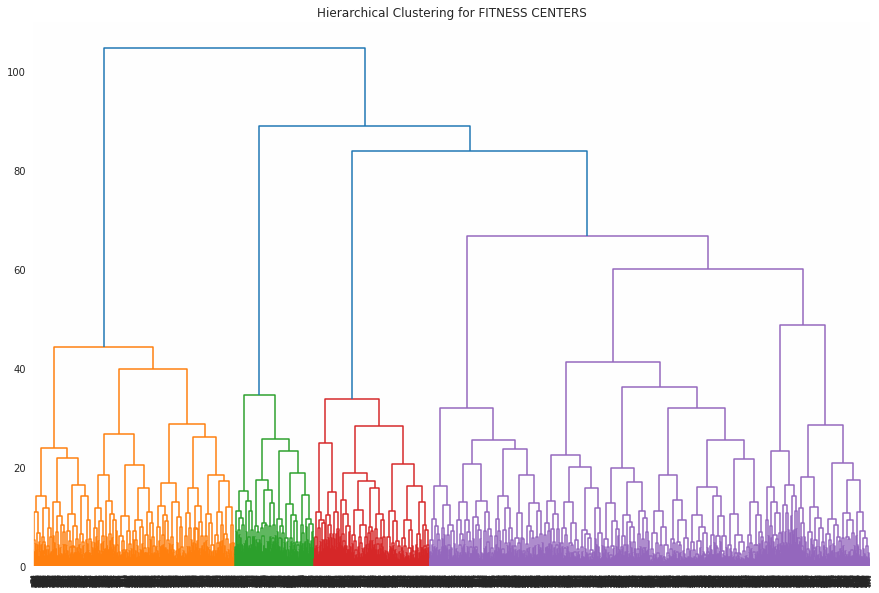

In [13]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering for FITNESS CENTERS')
plt.show()

The graph above indicates that the hierarchical clustering algorithm has identified four distinct clusters based on the customers' characteristics and behaviors within the data. The presence of four clusters also may suggest that the number of cluster perform for further analysis is four clusters approximately.

Train a clustering model using K-means algorithm. 

In [14]:
km = KMeans(n_clusters=5)

labels = km.fit_predict(X_sc)

#save users clustering as `cluster_kmeans` column 
df['cluster_kmeans'] = labels

Check the average value of the features for all the clusters

In [15]:
df.groupby(['cluster_kmeans']).mean().round().astype(int)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_kmeans,,,,,,,,,,,,,,
0,0,1,1,1,1,3,0,29,140,3,4,2,2,0
1,0,1,0,0,1,2,0,28,131,2,2,1,1,1
2,0,1,1,0,1,12,1,30,165,11,5,2,2,0
3,1,1,0,0,1,3,0,30,164,3,5,3,3,0
4,0,0,0,0,1,2,0,28,134,2,3,2,1,0


Calculate the churn rate for each cluster.

In [17]:
df.groupby('cluster_kmeans')['churn'].mean() * 100

cluster_kmeans
0    26.941363
1    51.453744
2     2.231668
3     5.481283
4    44.954128
Name: churn, dtype: float64

Create distribution graph of the features for each cluster.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

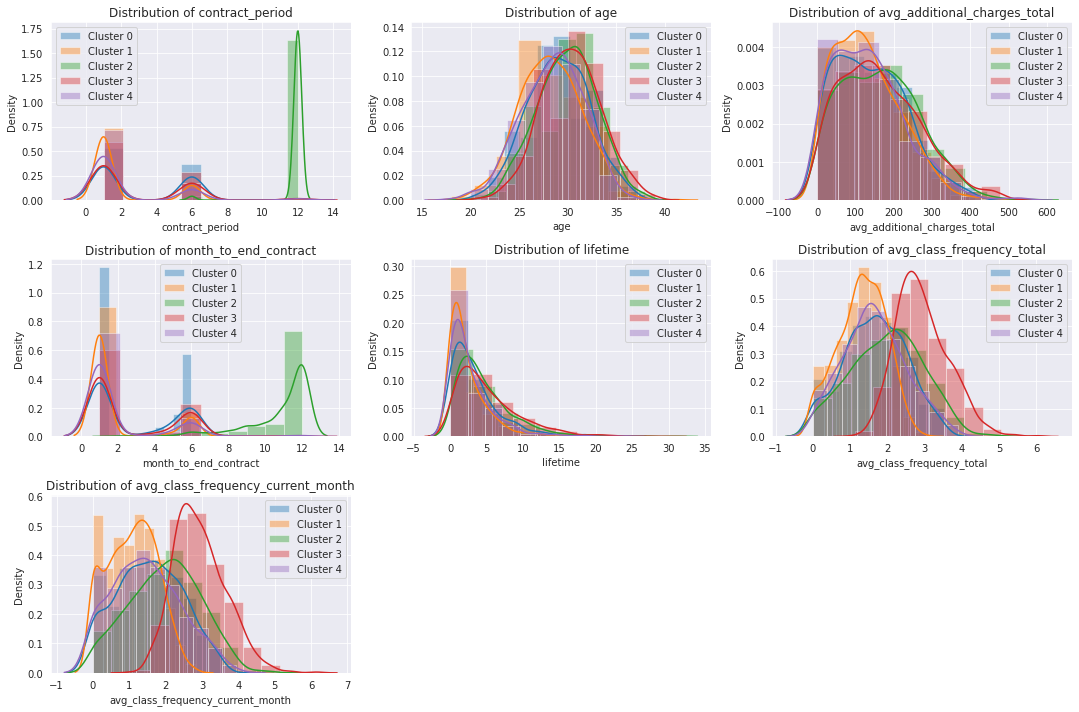

In [16]:
null = df[df['cluster_kmeans'] == 0] 
one = df[df['cluster_kmeans'] == 1]   
two = df[df['cluster_kmeans'] == 2]
three = df[df['cluster_kmeans'] == 3]
four = df[df['cluster_kmeans'] == 4]

columns = ['contract_period', 'age', 'avg_additional_charges_total', 
           'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
           'avg_class_frequency_current_month']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i) 
    sns.set_style('darkgrid')
    sns.distplot(null[column], bins=10, label='Cluster 0')
    sns.distplot(one[column], bins=10, label='Cluster 1')
    sns.distplot(two[column], bins=10, label='Cluster 2')
    sns.distplot(three[column], bins=10, label='Cluster 3')
    sns.distplot(four[column], bins=10, label='Cluster 4')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()  
plt.show()

Findings :

- Cluster 2 and cluster 3 considered to have a very low churn rate, which are under 10%
- The highest churn rate is in cluster 1, with 51.45% churn rate, and followed by cluster 4, with 44.95% churn rate
- Cluster 2 and cluster 3, which have highest retention rate among other clusters, provide similar profile of users, those are : age around 30 years old (which is older than the other clusters); five months of lifetime; and spend the most on additional charges compare to other clusters
- Meanwhile, cluster 1 and cluster 4, which have highest churn rate among other clusters, also share similar profile of users, those are : age around 28 years old (which is younger than the other clusters); shortest contract period which is only 2 months; spend the least on additional charges compare to other clusters; and both clusters mostly consist of gender 0  
- It is also can be seen from the graph above that cluster 2 and cluster 3 more frequently attend the class compare to other clusters

## Conclusion

This project aims to analyze Model Fitness' customer profiles and develop customer retention strategies.

The initial step in this project involves data preprocessing by correcting column names and then conducting exploratory data analysis. From the data analysis exploration, several points were identified, as follow:

- Customers who used to stay are around 30 years old, make visit more often then the one who leave, spend more money for additional charge than the one who leave, and tend to have longer contract period
- On the other hand, customers who used to leave are around 27 years old, make less visit compare to the one who stay, and tend to have shorter contract period
- There is no features that seems to have correlation with `month_to_end_contract`, except `contract_period` itself that directly affects the remaining period left.

The next step is to build machine learning models using two algorithms (logistic regression and random forest) and test their matrix. From the two algorithms used, the following findings were obtained:

- The logistic regression model appears to be a better choice between the two models, as it provides good predictive performance on both training and testing data and is less likely to overfit.

Meanwhile, based on the findings of K-means clustering algorithm used, we can draw the following conclusions and formulate recommendations related to customer interest and retention strategies:

1. **Cluster 1 and cluster 4 have the highest churn rates, suggesting a need for immediate attention.**
   - Implement targeted retention campaigns for these clusters to reduce churn rates.
   - Example: Offer extended trial periods, or discounts on additional services to encourage retention.

3. **Marketing Strategies to User Profiles:**
   - Formulate marketing messages and offerings based on clustering profiles to increase relevance and effectiveness.
   - Example: Send age-appropriate promotions, or offer short-term contracts for younger members.

4. **Promote Class Attendance:**
   - Cluster 2 and cluster 3 members are more frequent class attendees compared to other clusters, indicating a strong correlation between attendance and retention, thus, it is needed to encourage class participation among all clusters through targeted class promotions and reminders.
   - Example: Send class schedule notifications, or offer incentives for attending group classes.